In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt

path = "../input/lpx-hw/"  #Insert path here
database = path + 'co.sqlite'

In [2]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM covi;""", conn)
tables.head()

,provincename,provinceenglishname,province_confirmedcount,province_curedcount,province_deadcount,cityname,city_confirmedcount,city_curedcount,city_deadcount,updatetime,year,month,day
0,上海市,Shanghai,64685,63836,595,浦东新区,17235,16737,1,2022-12-04T00:00:00,2022,12,4
1,上海市,Shanghai,64685,63836,595,徐汇区,4719,4501,1,2022-12-04T00:00:00,2022,12,4
2,上海市,Shanghai,64685,63836,595,闵行区,5483,5282,0,2022-12-04T00:00:00,2022,12,4
3,上海市,Shanghai,64685,63836,595,黄浦区,6626,6458,0,2022-12-04T00:00:00,2022,12,4
4,上海市,Shanghai,64685,63836,595,虹口区,3706,3544,0,2022-12-04T00:00:00,2022,12,4


# 全国分省总体情况

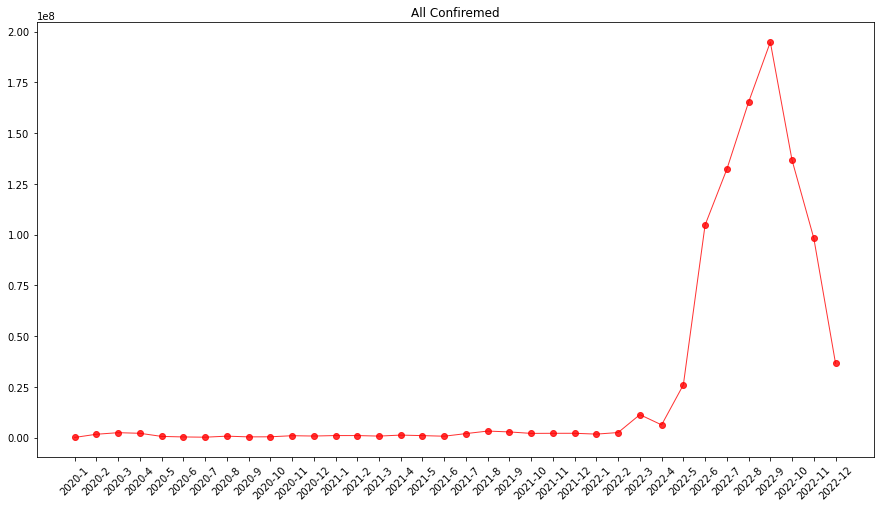

In [3]:
all_confirmed =  pd.read_sql("""SELECT SUM(city_confirmedcount) AS Confirmed,year,month
                    FROM covi
                    GROUP by year, month
                    ;""", conn)
plt.figure(figsize = (15,8))
all_confirmed['time'] = all_confirmed['year'].apply(str) + '-' + all_confirmed['month'].apply(str)
plt.plot(all_confirmed['time'], all_confirmed['Confirmed'],'ro-',alpha=0.8, linewidth=1)
plt.xticks(all_confirmed['time'] ,rotation = 45);
plt.title("All Confiremed");

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  import sys


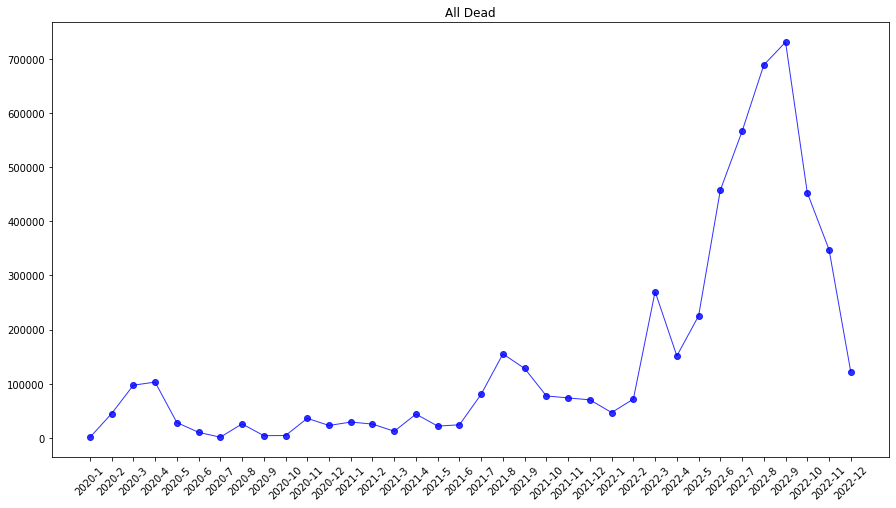

In [4]:
all_dead =  pd.read_sql("""SELECT SUM(city_deadcount) AS Dead,year,month
                    FROM covi
                    GROUP by year, month
                    ;""", conn)
plt.figure(figsize = (15,8))
all_dead['time'] = all_dead['year'].apply(str) + '-' + all_dead['month'].apply(str)
plt.plot(all_dead['time'], all_dead['Dead'],'ro-',color = 'b', alpha=0.8, linewidth=1)
plt.xticks(all_dead['time'] ,rotation = 45);
plt.title("All Dead");

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  if __name__ == "__main__":


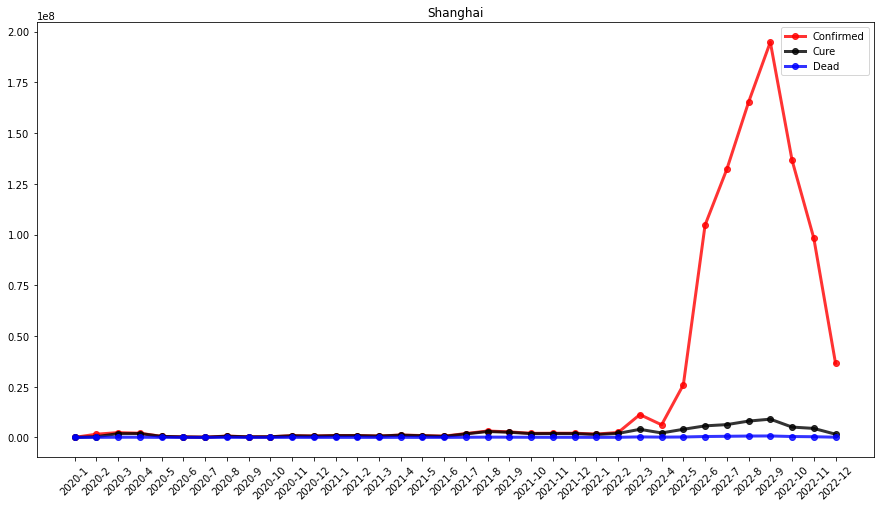

In [5]:
all_cure = pd.read_sql("""SELECT SUM(city_curedcount) AS Cure,year,month
                    FROM covi
                    GROUP by year,month
                    ;""", conn)
plt.figure(figsize = (15,8))
all_cure['time'] = all_cure['year'].apply(str) + '-' + all_cure['month'].apply(str)
plt.plot(all_confirmed['time'], all_confirmed['Confirmed'],'ro-',alpha=0.8, linewidth=3, label = 'Confirmed')
plt.plot(all_cure['time'], all_cure['Cure'],'ro-',color = 'black',alpha=0.8, linewidth=3, label = 'Cure')
plt.plot(all_dead['time'], all_dead['Dead'],'ro-',color = 'b',alpha=0.8, linewidth=3, label = 'Dead')
plt.xticks(all_cure['time'] ,rotation = 45);
plt.title("Shanghai");
plt.legend(loc="best");

# 上海
## 总体情况

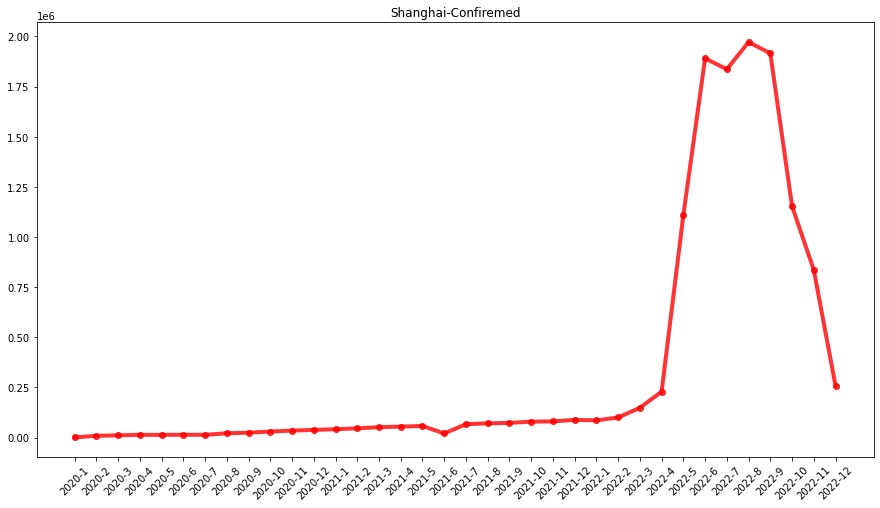

In [6]:
SH_confirmed = pd.read_sql("""SELECT provincename,SUM(city_confirmedcount) AS Confirmed,year,month
                    FROM covi
                    WHERE provincename = '上海市'
                    GROUP by year,month
                    ;""", conn)
plt.figure(figsize = (15,8))
SH_confirmed['time'] = SH_confirmed['year'].apply(str) + '-' + SH_confirmed['month'].apply(str)
plt.plot(SH_confirmed['time'], SH_confirmed['Confirmed'],'ro-',alpha=0.8, linewidth=4)
plt.xticks(SH_confirmed['time'] ,rotation = 45);
plt.title("Shanghai-Confiremed");

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  


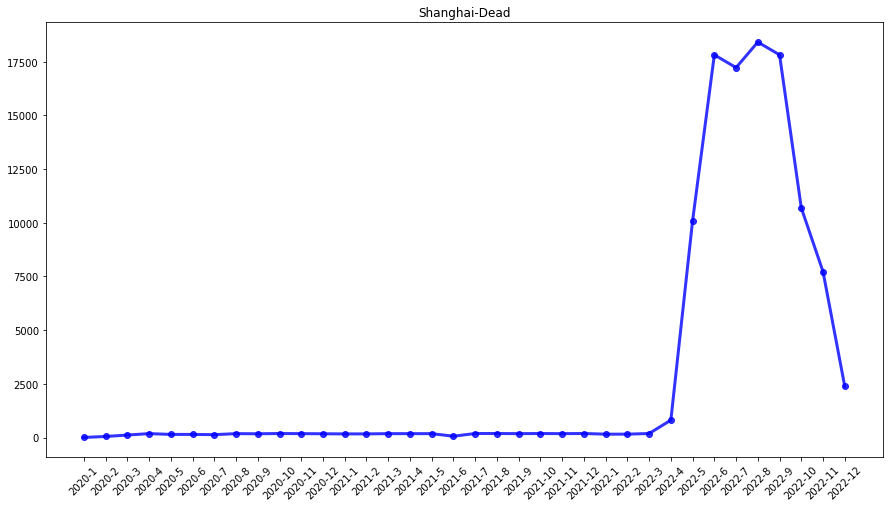

In [7]:
SH_dead = pd.read_sql("""SELECT provincename,SUM(city_deadcount) AS dead,year,month
                    FROM covi
                    WHERE provincename = '上海市'
                    GROUP by year,month
                    ;""", conn)
plt.figure(figsize = (15,8))
SH_dead['time'] = SH_dead['year'].apply(str) + '-' + SH_dead['month'].apply(str)
plt.plot(SH_dead['time'], SH_dead['dead'],'ro-',color = 'b',alpha=0.8, linewidth=3)
plt.xticks(SH_dead['time'] ,rotation = 45);
plt.title("Shanghai-Dead");

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


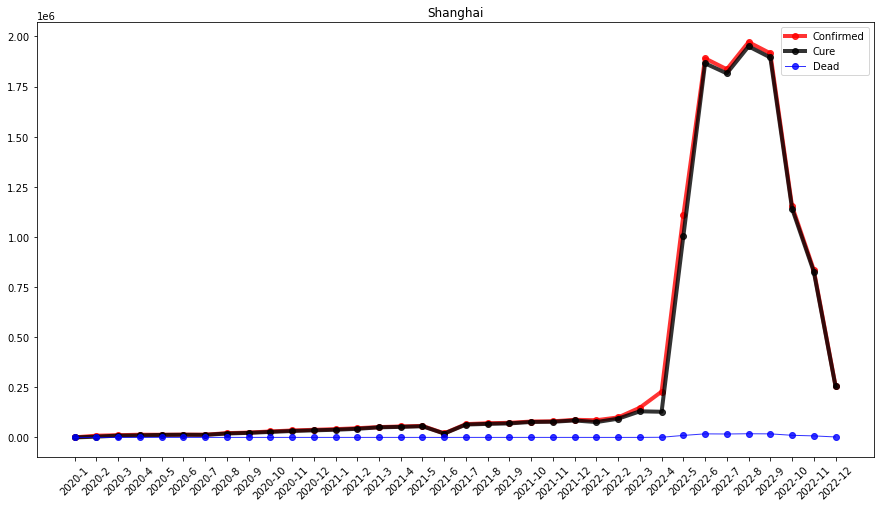

In [8]:
SH_cure = pd.read_sql("""SELECT provincename,SUM(city_curedcount) AS Cure,year,month
                    FROM covi
                    WHERE provincename = '上海市'
                    GROUP by year,month
                    ;""", conn)
plt.figure(figsize = (15,8))
SH_cure['time'] = SH_cure['year'].apply(str) + '-' + SH_cure['month'].apply(str)
plt.plot(SH_confirmed['time'], SH_confirmed['Confirmed'],'ro-',alpha=0.8, linewidth=4, label = 'Confirmed')
plt.plot(SH_cure['time'], SH_cure['Cure'],'ro-',color = 'black',alpha=0.8, linewidth=4, label = 'Cure')
plt.plot(SH_dead['time'], SH_dead['dead'],'ro-',color = 'b',alpha=0.8, linewidth=1, label = 'Dead')
plt.xticks(SH_cure['time'] ,rotation = 45);
plt.title("Shanghai");
plt.legend(loc="best");

## 分区对比